In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
MainTable = pd.read_csv("/Users/ghostpc/Desktop/DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

# Missing value percentage

In [15]:
percent_missing = (MainTable.isnull().sum() / MainTable.isnull().count()*100).sort_values(ascending = False)
percent_missing

Product Description              100.000000
Order Zipcode                     86.239676
Customer Lname                     0.004432
Customer Zipcode                   0.001662
Type                               0.000000
Order Profit Per Order             0.000000
Order Item Cardprod Id             0.000000
Order Item Discount                0.000000
Order Item Discount Rate           0.000000
Order Item Id                      0.000000
Order Item Product Price           0.000000
Order Item Profit Ratio            0.000000
Order Item Quantity                0.000000
Sales                              0.000000
Order Item Total                   0.000000
Order Region                       0.000000
order date (DateOrders)            0.000000
Order State                        0.000000
Order Status                       0.000000
Product Card Id                    0.000000
Product Category Id                0.000000
Product Image                      0.000000
Product Name                    

# Remove unwanted columns

In [22]:
df = MainTable.drop(columns=['Product Description', 'Order Zipcode','Customer Fname','Customer Lname','Customer Zipcode','Order Item Cardprod Id','Order Item Id','Product Card Id','Product Category Id','Order Id','Order Customer Id','Category Id','Customer Id','Department Id','Customer Email','Customer Password','Customer Street','Latitude','Longitude','Product Image'])
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Name', 'Product Price',
       'Product Status', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

# Heat map

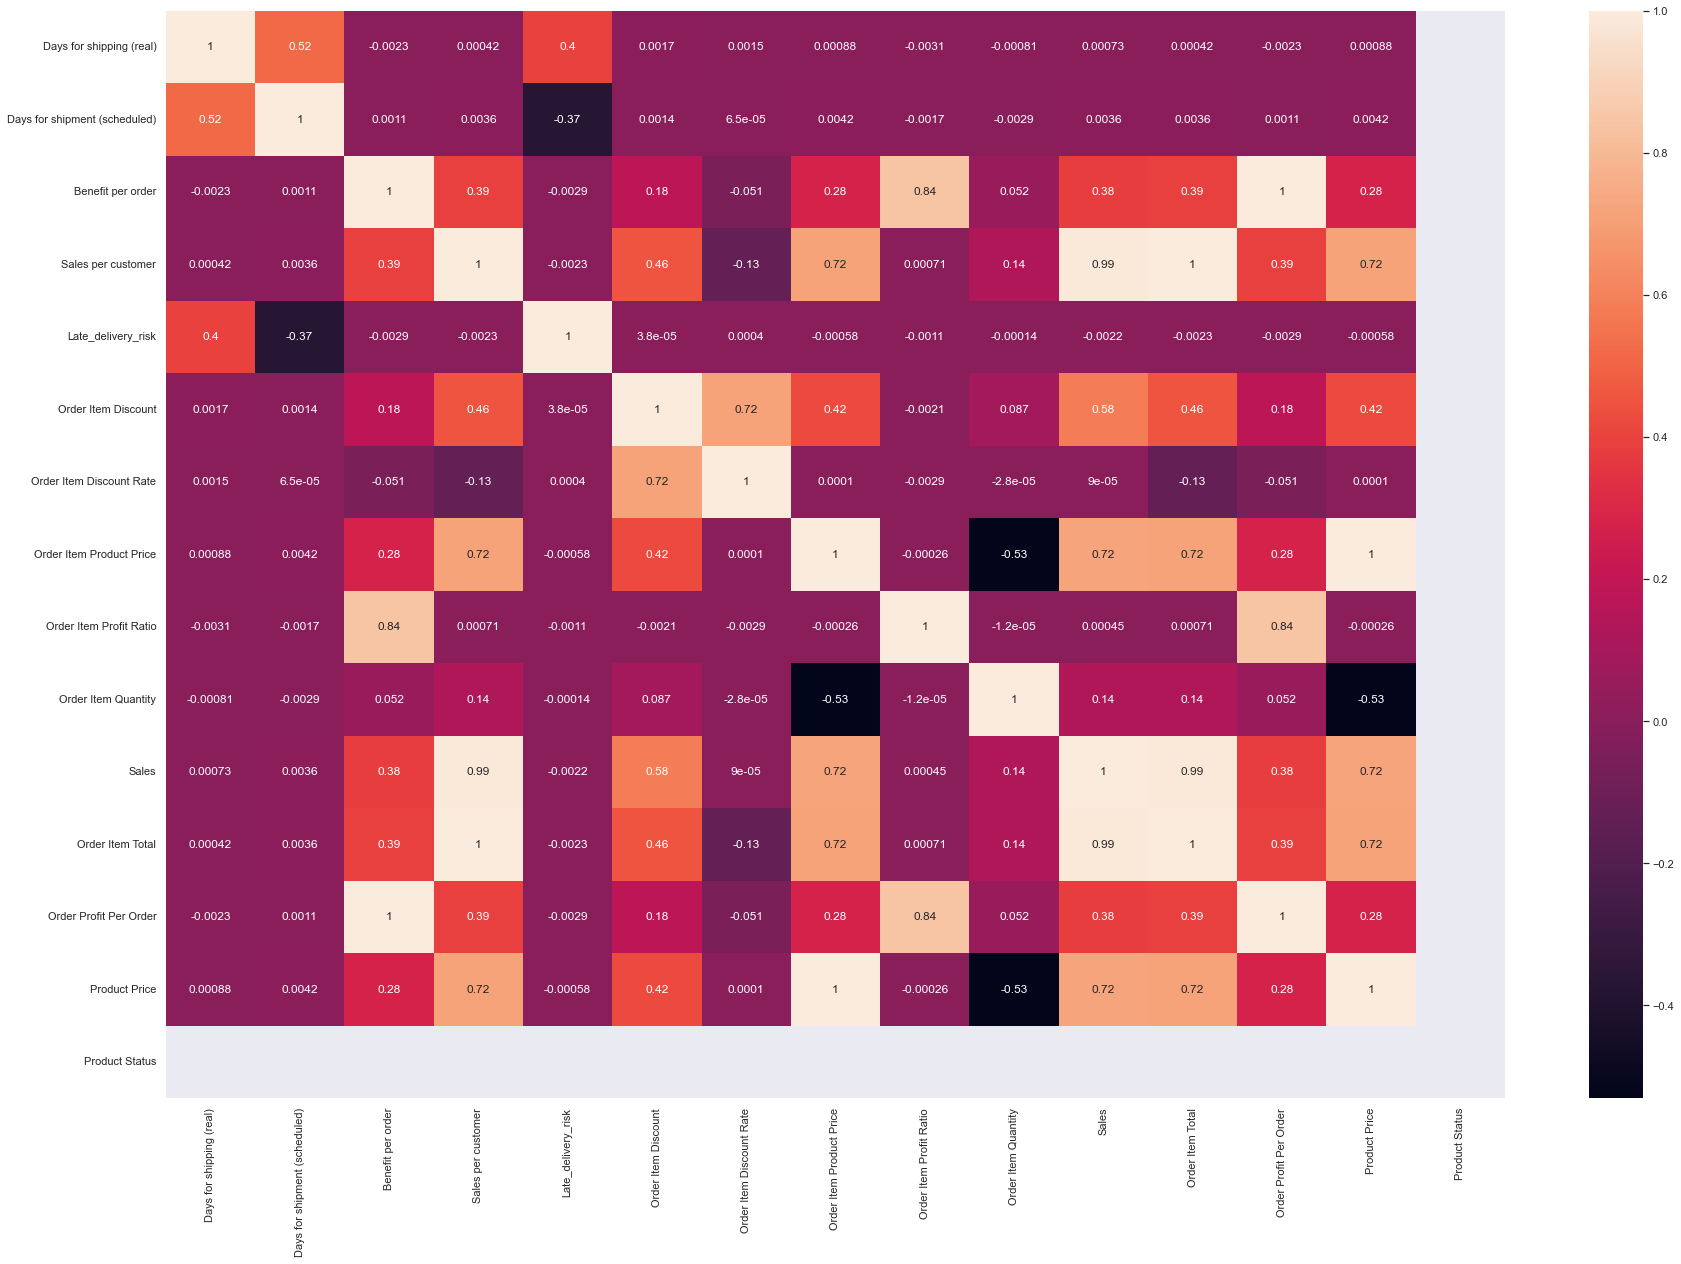

In [32]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Outlier treatments

<AxesSubplot:>

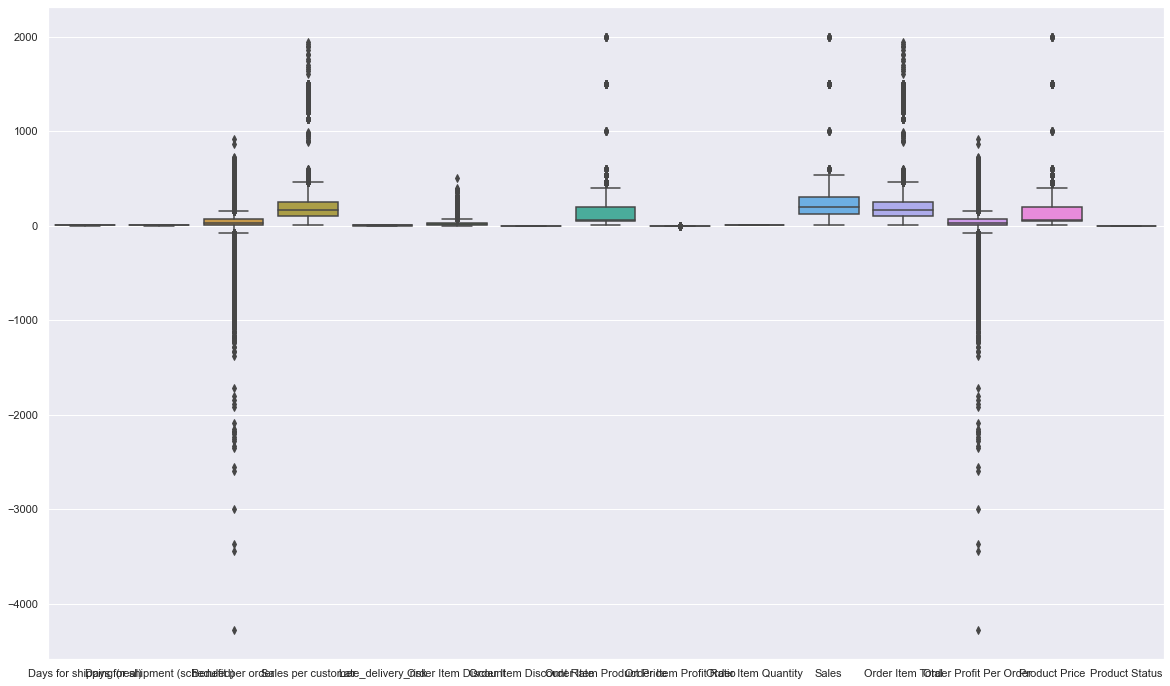

In [27]:
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=df)

In [28]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes in ['float64','int64'] ]
numerical_features

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price',
 'Product Status']

In [30]:
# Write a loop to do for all Numerical Features
for feat in numerical_features:
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)

    IQR = Q3-Q1

    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    
    df[feat] = df[feat].apply(lambda x : Upper_Whisker if x > Upper_Whisker else x)
    df[feat] = df[feat].apply(lambda x : Lower_Whisker if x < Lower_Whisker else x)

<AxesSubplot:>

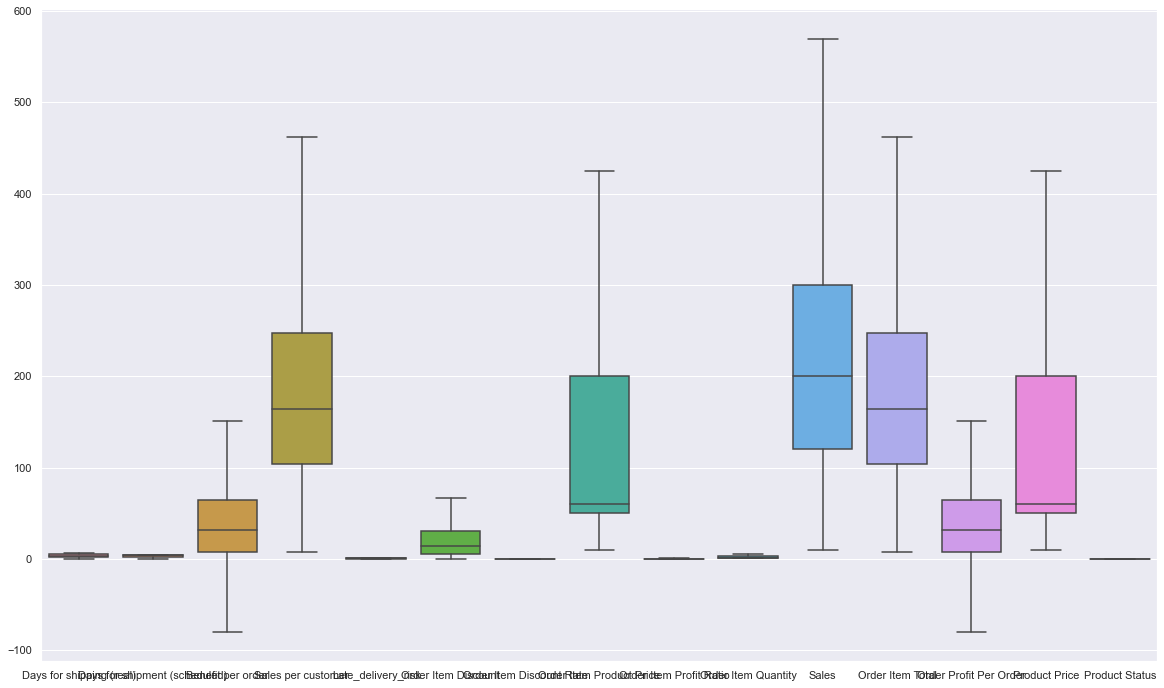

In [31]:
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=df)

# Cleaned data set download

In [33]:
df.to_csv('CleanedData.csv',index=False)